<a href="https://colab.research.google.com/github/EddyGiusepe/ML_Mastery_Adding_Noise_Red_Neural/blob/main/ML_Mastery_Adding_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adding noise numa Rede Neural

Estudaremos e entenderemos que adicionar ruído a uma rede neural durante o treinamento pode melhorar a robustez da rede, resultando em uma melhor generalização e em um aprendizado mais rápido.

Treinar uma rede neural com um pequeno conjunto de dados pode fazer com que a rede memorize todos os exemplos de treinamento, levando a um desempenho ruim em um conjunto de dados de validação.


**Uma abordagem para tornar o espaço de entrada mais suave e fácil de aprender é adicionar ruído às entradas durante o treinamento**.

A adição de ruído durante o treinamento de um modelo de rede neural tem um efeito de regularização e, por sua vez, melhora a robustez do modelo.


O ruído pode ser adicionado ao seu modelo no ``Keras`` por meio da camada ``GaussianNoise``. Por exemplo:

**model.add(GaussianNoise(0.1))​**


O ruído pode ser adicionado a um modelo na camada de entrada ou entre camadas ocultas.

O exemplo abaixo demonstra um modelo de Perceptron multicamadas com ruído adicionado entre as camadas ocultas em um problema de classificação binária.

## Importamos nossas livrarias

In [1]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise
from matplotlib import pyplot

## Geramos nosso Dataset

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

## Dividimos em Dados de treinamento e Dados de teste

In [3]:
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

## Criamos nossa Rede Neuronal

In [4]:
model = Sequential()

model.add(Dense(500, input_dim=2, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))

## Compilamos nosso modelo

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Ajustamos nosso modelo

In [6]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=0)

## Avaliamos nossa Rede Neuronal

In [7]:
_, train_acc = model.evaluate(trainX, trainy, verbose=1)
_, test_acc = model.evaluate(testX, testy, verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: 0.4389 - accuracy: 0.8000


In [8]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.800


## Graficamos as nossas curvas de aprendizagens

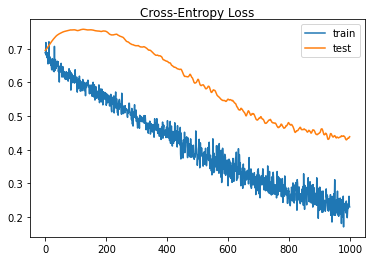

In [9]:
# plot loss learning curves

#pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

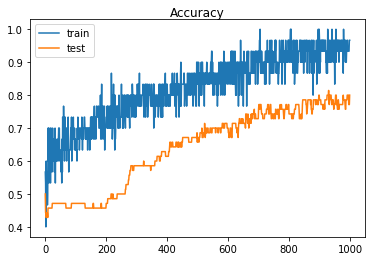

In [10]:
# plot accuracy learning curves


#pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


**Nota:**
Você pode executar o exemplo de código com e sem a adição de ruído e descrever o efeito que isso tem nas curvas de aprendizado durante o treinamento.